In [3]:


import math

def cartesian_to_polar(points):
    polar_coords = []
    for x, y in points:
        radius = math.sqrt(x**2 + y**2)
        angle = math.degrees(math.atan2(y, x))  # Convert radians to degrees
        polar_coords.append((radius, angle))
    return polar_coords

# Example usage
points = [
    [40.431907,116.570374], 
    [20.683056, -88.568651], 
    [30.328611, 35.444167], 
    [-13.163136, -72.544962], 
    [-22.951916, -43.210487], 
    [41.890251, 12.492373], 
    [27.175015, 78.042155]
    ]
polar_coordinates = cartesian_to_polar(points)

for i, (r, theta) in enumerate(polar_coordinates):
    print(f"Point {i+1}: Radius = {r:.2f}, Angle = {theta:.2f} degrees")

Point 1: Radius = 123.38, Angle = 70.87 degrees
Point 2: Radius = 90.95, Angle = -76.86 degrees
Point 3: Radius = 46.65, Angle = 49.45 degrees
Point 4: Radius = 73.73, Angle = -100.28 degrees
Point 5: Radius = 48.93, Angle = -117.98 degrees
Point 6: Radius = 43.71, Angle = 16.61 degrees
Point 7: Radius = 82.64, Angle = 70.80 degrees


In [4]:

import numpy as np

def extrapolate_theta(r1, theta1, r2, b, spiral_type="archimedean"):
    if spiral_type == "archimedean":
        theta2 = theta1 + (r2 - r1) / b
    elif spiral_type == "logarithmic":
        theta2 = theta1 + np.log(r2 / r1) / b
    else:
        raise ValueError("Invalid spiral type. Choose 'archimedean' or 'logarithmic'.")
    return theta2

# Example usage
r1, theta1 = 5, 30  # Given point (r1, theta1)
r2 = 10             # New radius
b = 2               # Growth rate (assumed)

theta2 = extrapolate_theta(r1, theta1, r2, b, spiral_type="archimedean")
print(f"Extrapolated Theta for r={r2}: {theta2:.2f} degrees")


Extrapolated Theta for r=10: 32.50 degrees


Colosseum


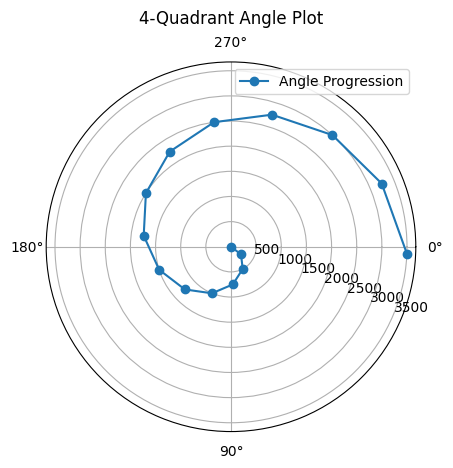

khaznah-petra-jordan


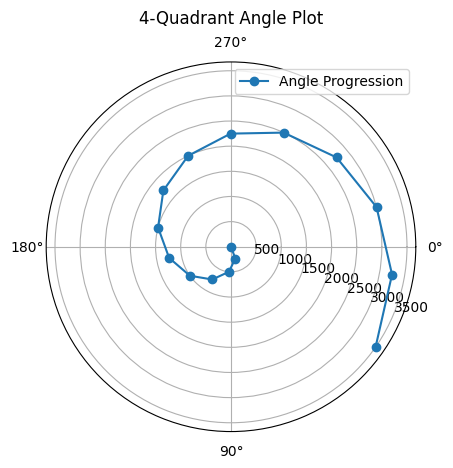

christ-the-redeemer-rio-de-janeeiro-brazil


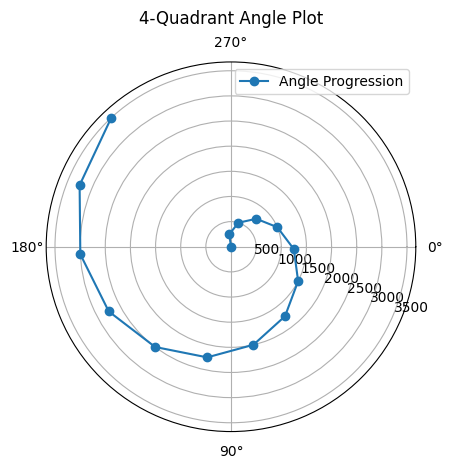

machu-pichhu-peru


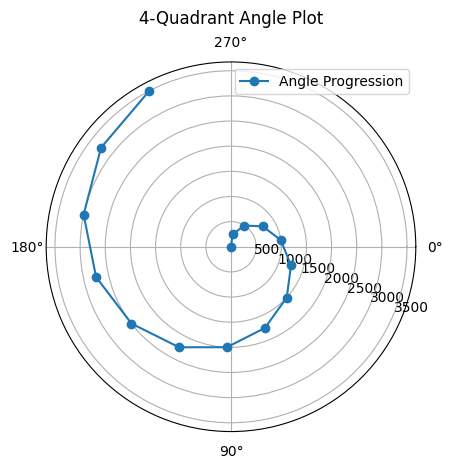

taj-mahal


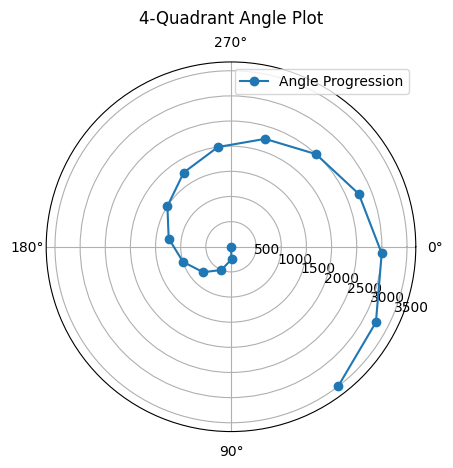

chichen-itza


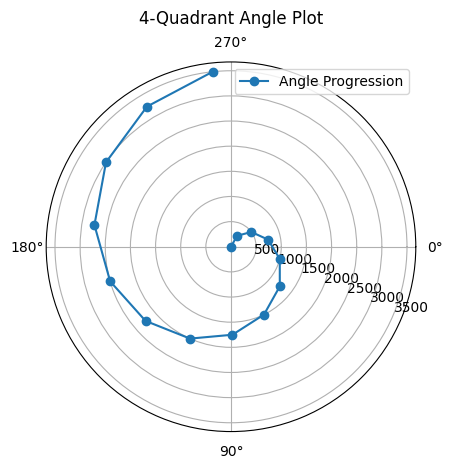

great-wall-of-china


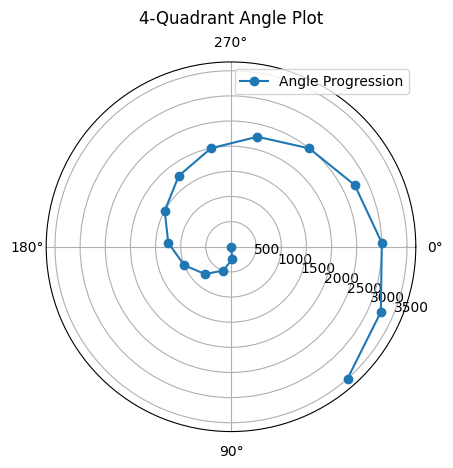

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample angles in degrees
spirals = {'Colosseum': [12.234130068689595, 37.234130068689595, 62.234130068689595, 87.2341300686896, 112.2341300686896, 137.23413006868958, 162.23413006868958, 187.23413006868958, 212.23413006868958, 237.23413006868958, 262.2341300686896, 287.2341300686896, 312.2341300686896, 337.2341300686896, 362.2341300686896], 'khaznah-petra-jordan': [44.78241105691769, 69.78241105691768, 94.78241105691768, 119.78241105691768, 144.78241105691768, 169.78241105691768, 194.78241105691768, 219.78241105691768, 244.78241105691768, 269.7824110569177, 294.7824110569177, 319.7824110569177, 344.7824110569177, 369.7824110569177, 394.7824110569177], 'christ-the-redeemer-rio-de-janeeiro-brazil': [-122.86848151653048, -97.86848151653048, -72.86848151653048, -47.86848151653048, -22.86848151653048, 2.13151848346952, 27.131518483469534, 52.131518483469534, 77.13151848346953, 102.1315184834695, 127.1315184834695, 152.13151848346948, 177.13151848346948, 202.13151848346948, 227.13151848346948], 'machu-pichhu-peru': [-107.65726259237387, -82.65726259237387, -57.65726259237387, -32.65726259237387, -7.657262592373868, 17.342737407626146, 42.34273740762613, 67.34273740762613, 92.34273740762613, 117.34273740762613, 142.34273740762615, 167.34273740762615, 192.34273740762615, 217.34273740762615, 242.34273740762615], 'taj-mahal': [62.53758807491992, 87.53758807491991, 112.53758807491991, 137.5375880749199, 162.5375880749199, 187.5375880749199, 212.5375880749199, 237.5375880749199, 262.5375880749199, 287.5375880749199, 312.5375880749199, 337.5375880749199, 362.5375880749199, 387.5375880749199, 412.5375880749199], 'chichen-itza': [-85.95068623030275, -60.95068623030275, -35.95068623030274, -10.95068623030275, 14.04931376969725, 39.04931376969725, 64.04931376969725, 89.04931376969725, 114.04931376969725, 139.04931376969725, 164.04931376969725, 189.04931376969728, 214.04931376969728, 239.04931376969728, 264.0493137696973], 'great-wall-of-china': [58.5328174834122, 83.5328174834122, 108.5328174834122, 133.5328174834122, 158.5328174834122, 183.5328174834122, 208.5328174834122, 233.5328174834122, 258.5328174834122, 283.5328174834122, 308.5328174834122, 333.5328174834122, 358.5328174834122, 383.5328174834122, 408.5328174834122]}

for spiral, angles in spirals.items():

    print(spiral)
    # X-axis values (indices)
    indices = np.arange(0, (15*250), 250)

    # Convert degrees to radians for plotting
    angles_rad = np.radians(angles)

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_theta_zero_location('E')  # 0° at the right (East)
    ax.set_theta_direction(-1)       # Clockwise direction

    # Plot points
    ax.plot(angles_rad, indices, marker='o', linestyle='-', label="Angle Progression")

    # Add labels
    ax.set_title("4-Quadrant Angle Plot", va='bottom')
    ax.set_xticks(np.radians([0, 90, 180, 270]))  # Set 0°, 90°, 180°, and 270° labels
    ax.set_xticklabels(["0°", "90°", "180°", "270°"])

    # Show grid and legend
    ax.grid(True)
    ax.legend()

    # Display the plot
    plt.show()


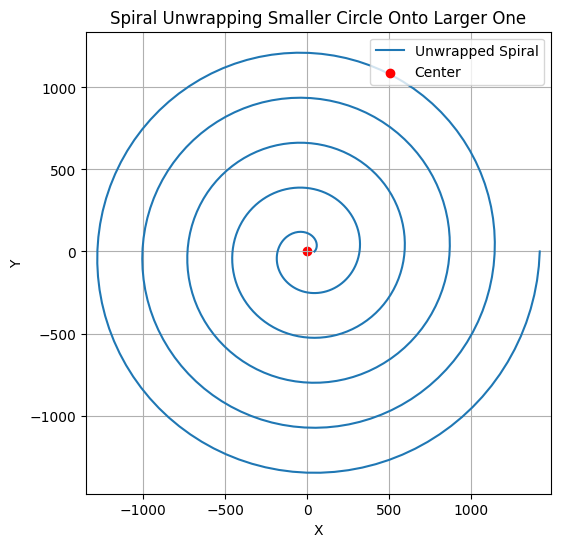

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r_s = 43.7132990291757  # Radius of the smaller circle
num_turns = 5  # Number of spiral turns
theta = np.linspace(0, num_turns * 2 * np.pi, 500)  # Angle values

# Archimedean Spiral Equation: r = r_s + b * theta
b = r_s  # Growth factor (equal to the smaller circle's radius)
r = r_s + b * theta  # Radial distance

# Convert to Cartesian coordinates
x = r * np.cos(theta)
y = r * np.sin(theta)

# Plot the spiral
plt.figure(figsize=(6,6))
plt.plot(x, y, label="Unwrapped Spiral")
plt.scatter(0, 0, color='red', marker='o', label="Center")  # Mark center
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Spiral Unwrapping Smaller Circle Onto Larger One")
plt.legend()
plt.grid()
plt.axis("equal")  # Keep the aspect ratio circular

plt.show()
